In [1]:
# Import necessary libraries
import import_ipynb
# import exploration
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.utils import resample
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import xgboost as xgb 

## Merging the two datasets base on their Account ID

In [2]:

def merge_datasets(dataset1_path, dataset2_path, merge_column):
    # Load the datasets
    df1 = pd.read_csv(dataset1_path)
    df2 = pd.read_csv(dataset2_path)
    
    # Merge the datasets based on the specified column
    merged_df = pd.merge(df1, df2, on=merge_column, how='inner')
    
    return merged_df

# Example usage:
dataset1_path = "../data/orders_data_competition.csv"
dataset2_path = "../data/clients_data_competition.csv"
merge_column = "Account ID"

df = merge_datasets(dataset1_path, dataset2_path, merge_column)
df.sample(10)


,Order ID,Account ID,Market Key,Security ID,Order Type,Order Time,Order Via,Is Completed,Is Canceled,Expire Date,...,Gender,Risk Rate,Company Name,Is Closed,Is Dormant,Is Profile Suspended,Is Client Suspended,Client Type Name,OpenDate,BirthDate
1319105,1319105,1136,Egypt,8,Buy,2023-08-07 11:33:39.000,Online,1,0,2023-08-07 00:00:00.000,...,Female,Low,HSB,0,0.0,0,0,Individuals,1/19/2010,1949-03-04
1961012,1961012,8211,Egypt,66,Sell,2024-02-28 10:20:44.000,Online,1,0,2024-02-28 00:00:00.000,...,Male,Low,HSB,0,0.0,0,0,Individuals,7/4/2021,1969-07-28
568017,568017,895,Egypt,48,Sell,2022-09-06 10:57:15.000,Online,0,0,2022-09-06 00:00:00.000,...,Male,Low,HSB,0,0.0,0,0,Individuals,10/16/2008,1958-08-22
219368,219368,10675,Egypt,166,Buy,2022-01-02 12:20:06.000,Online,0,0,2022-01-02 00:00:00.000,...,Female,Low,HSB,0,0.0,0,0,Individuals,12/27/2021,2001-06-25
1171691,1171691,1789,Egypt,81,Buy,2023-05-29 13:16:15.000,Telephone,1,0,2023-05-29 00:00:00.000,...,Male,Not Assigned,HSB,0,0.0,0,0,Individuals,4/30/2023,2004-10-07
567903,567903,11333,Egypt,70,Buy,2022-09-06 10:49:56.000,Online,1,0,2022-09-06 00:00:00.000,...,Male,Low,HSB,0,0.0,0,0,Individuals,1/22/2008,1985-12-15
414538,414538,10653,Egypt,58,Buy,2022-05-25 11:54:30.000,Online,1,0,2022-05-25 00:00:00.000,...,Male,Medium,HSB,0,0.0,0,0,Individuals,12/2/2007,1981-05-15
460832,460832,7619,Egypt,5,Buy,2022-07-05 12:26:20.000,Online,0,1,2022-07-05 00:00:00.000,...,Male,Low,HSB,0,0.0,0,0,Individuals,5/19/2021,1974-11-06
735412,735412,12435,Egypt,81,Buy,2022-11-27 11:25:03.000,Telephone,1,0,2022-11-27 00:00:00.000,...,Female,Not Assigned,HSB,0,0.0,0,0,Individuals,9/22/2022,1946-03-16
128731,128731,7633,Egypt,15,Buy,2023-12-31 13:09:02.000,Online,0,1,2023-12-31 00:00:00.000,...,Male,Medium,HSB,0,0.0,0,0,Individuals,8/26/2019,1992-03-22


In [3]:
# Check for missing values
print("\nMissing values in the dataset:")
df.isnull().sum()



Missing values in the dataset:


Order ID                0
Account ID              0
Market Key              0
Security ID             0
Order Type              0
Order Time              0
Order Via               0
Is Completed            0
Is Canceled             0
Expire Date             6
Execution Status        1
quantity                0
Price                   0
Sector Name             0
Executed Quantity       0
Quantity                0
Client ID               0
Gender                  0
Risk Rate               0
Company Name            0
Is Closed               0
Is Dormant              0
Is Profile Suspended    0
Is Client Suspended     0
Client Type Name        0
OpenDate                0
BirthDate               0
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.nunique()

Order ID                1987936
Account ID                 9727
Market Key                    1
Security ID                 335
Order Type                    2
Order Time              1749453
Order Via                     4
Is Completed                  2
Is Canceled                   2
Expire Date                 828
Execution Status              3
quantity                  32994
Price                     20033
Sector Name                  23
Executed Quantity         28705
Quantity                  32994
Client ID                  8751
Gender                        2
Risk Rate                     4
Company Name                  1
Is Closed                     2
Is Dormant                    2
Is Profile Suspended          2
Is Client Suspended           2
Client Type Name              2
OpenDate                   3260
BirthDate                  7631
dtype: int64

In [6]:
def drop_null_rows(df):
    # Drop rows with null values
    df.dropna(inplace=True)
    return df

# Example usage:
# Assuming df is your DataFrame
df = drop_null_rows(df)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987936 entries, 0 to 1987942
Data columns (total 27 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Order ID              int64  
 1   Account ID            int64  
 2   Market Key            object 
 3   Security ID           int64  
 4   Order Type            object 
 5   Order Time            object 
 6   Order Via             object 
 7   Is Completed          int64  
 8   Is Canceled           int64  
 9   Expire Date           object 
 10  Execution Status      object 
 11  quantity              int64  
 12  Price                 float64
 13  Sector Name           object 
 14  Executed Quantity     int64  
 15  Quantity              int64  
 16  Client ID             int64  
 17  Gender                object 
 18  Risk Rate             object 
 19  Company Name          object 
 20  Is Closed             int64  
 21  Is Dormant            float64
 22  Is Profile Suspended  int64  
 23  Is Client Su

In [8]:
def remove_unnecessary_attributes(data, attributes_to_remove):
    """Remove unnecessary attributes from the dataset."""
    # Remove attributes with only one unique value
    data = data.loc[:, data.nunique() > 1]

    # Remove attributes specified in attributes_to_remove
    columns_to_remove = [col for col in attributes_to_remove if col in data.columns]
    data.drop(columns=columns_to_remove, inplace=True)

    return data

# Example usage:
attributes_to_remove = ["Order ID", "Account ID", "Security ID", "Client ID","Order Time", "OpenDate", "Quantity", "BirthDate"]
df = remove_unnecessary_attributes(df, attributes_to_remove)

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_32172\3983029155.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=columns_to_remove, inplace=True)


In [9]:
df.nunique()

Order Type                  2
Order Via                   4
Is Completed                2
Is Canceled                 2
Expire Date               828
Execution Status            3
quantity                32994
Price                   20033
Sector Name                23
Executed Quantity       28705
Gender                      2
Risk Rate                   4
Is Closed                   2
Is Dormant                  2
Is Profile Suspended        2
Is Client Suspended         2
Client Type Name            2
dtype: int64

In [10]:

# Assuming 'df' is your DataFrame
df["Price"] = df["Price"].astype(int)

# Change data types
df["Is Completed"] = df["Is Completed"].astype(bool)
df["Is Canceled"] = df["Is Canceled"].astype(bool)
df["Is Closed"] = df["Is Closed"].astype(bool)
df["Is Profile Suspended"] = df["Is Profile Suspended"].astype(bool)
df["Is Client Suspended"] = df["Is Client Suspended"].astype(bool)
df["Is Dormant"] = df["Is Dormant"].astype(bool)
df['Order Type'] = df['Order Type'].astype(bool)
df["Gender"] = df["Gender"].astype(bool)
df["Risk Rate"] = df["Risk Rate"].astype(bool)

# Convert 'Order Type', 'Order Time', 'Order Via', 'Expire Date', 'Execution Status', 'Sector Name', 'Client Type Name' to category if they have limited unique values
df["Order Via"] = df["Order Via"].astype("category")
df["Expire Date"] = pd.to_datetime(df["Expire Date"])
df["Execution Status"] = df["Execution Status"].astype("category")
df["Sector Name"] = df["Sector Name"].astype("category")
df["Client Type Name"] = df["Client Type Name"].astype("category")

# Convert categorical variables to codes
df['Order Via'] = df['Order Via'].cat.codes
df['Execution Status'] = df['Execution Status'].cat.codes
df['Sector Name'] = df['Sector Name'].cat.codes
df['Client Type Name'] = df['Client Type Name'].cat.codes

# Add Year and Month of Expire date and remove the date itself
df["Expire Year"] = pd.to_datetime(df["Expire Date"]).dt.year
df["Expire Month"] = pd.to_datetime(df["Expire Date"]).dt.month
df = remove_unnecessary_attributes(df, ["Expire Date"])
df["Expire Year"] = df["Expire Year"].astype("category")
df["Expire Month"] = df["Expire Month"].astype("category")
df['Expire Year'] = df['Expire Year'].cat.codes
df['Expire Month'] = df['Expire Month'].cat.codes




C:\Users\Mohamed\AppData\Local\Temp\ipykernel_32172\3983029155.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=columns_to_remove, inplace=True)


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1987936 entries, 0 to 1987942
Data columns (total 15 columns):
 #   Column                Dtype
---  ------                -----
 0   Order Via             int8 
 1   Is Completed          bool 
 2   Is Canceled           bool 
 3   Execution Status      int8 
 4   quantity              int64
 5   Price                 int32
 6   Sector Name           int8 
 7   Executed Quantity     int64
 8   Is Closed             bool 
 9   Is Dormant            bool 
 10  Is Profile Suspended  bool 
 11  Is Client Suspended   bool 
 12  Client Type Name      int8 
 13  Expire Year           int8 
 14  Expire Month          int8 
dtypes: bool(6), int32(1), int64(2), int8(6)
memory usage: 75.8 MB


In [12]:

def undersample_tomek_links(df, target_column):
    """
    Undersample the majority class using Tomek links.
    
    Parameters:
    - df: DataFrame containing the dataset.
    - target_column: Name of the column representing the target variable.
    
    Returns:
    - balanced_df: DataFrame with balanced classes.
    """
    # Separate data into features and target variable
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Undersample using Tomek links
    tl = TomekLinks()
    X_resampled, y_resampled = tl.fit_resample(X, y)

    # Combine resampled data into DataFrame
    balanced_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name=target_column)], axis=1)

    return balanced_df

# Example usage:
df = undersample_tomek_links(df, "Is Closed")


In [13]:
def save_preprocessed_dataset(df, file_path):
    """
    Save preprocessed DataFrame to a CSV file.
    
    Parameters:
    - df: Preprocessed DataFrame.
    - file_path: File path to save the CSV file.
    """
    df.to_csv(file_path, index=False)
    print(f"Preprocessed dataset saved to {file_path}")

# Example usage:
# Assuming df is your preprocessed DataFrame and file_path is the desired file path
file_path = "../data/preprocessed_dataset.csv"
save_preprocessed_dataset(df, file_path)


Preprocessed dataset saved to ../data/preprocessed_dataset.csv


# Exploration 

## Import necessary libraries 

In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.utils import resample
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import xgboost as xgb 

In [15]:
df.columns

Index(['Order Via', 'Is Completed', 'Is Canceled', 'Execution Status',
       'quantity', 'Price', 'Sector Name', 'Executed Quantity', 'Is Dormant',
       'Is Profile Suspended', 'Is Client Suspended', 'Client Type Name',
       'Expire Year', 'Expire Month', 'Is Closed'],
      dtype='object')

In [16]:
# Summary statistics
print("\nSummary statistics of the dataset:")
df.describe()



Summary statistics of the dataset:


,Order Via,Execution Status,quantity,Price,Sector Name,Executed Quantity,Client Type Name,Expire Year,Expire Month
count,1.987588e+06,1.987588e+06,1.987588e+06,1.987588e+06,1.987588e+06,1.987588e+06,1.987588e+06,1.987588e+06,1.987588e+06
mean,2.034528e+00,4.556392e-01,2.755562e+04,1.818708e+01,8.800501e+00,1.449641e+04,9.954925e-01,8.635960e-01,5.210666e+00
std,3.356103e-01,5.155985e-01,3.815965e+05,1.101374e+02,4.052137e+00,1.146951e+05,6.698625e-02,6.942814e-01,3.915791e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,7.000000e+02,1.000000e+00,6.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
50%,2.000000e+00,0.000000e+00,2.600000e+03,5.000000e+00,9.000000e+00,2.000000e+02,1.000000e+00,1.000000e+00,5.000000e+00
75%,2.000000e+00,1.000000e+00,1.000000e+04,1.600000e+01,1.100000e+01,4.000000e+03,1.000000e+00,1.000000e+00,9.000000e+00
max,3.000000e+00,2.000000e+00,4.000000e+08,8.246300e+04,2.200000e+01,3.000000e+07,1.000000e+00,2.000000e+00,1.100000e+01


Since there is not too many null values, we can drop them 

          Order Via  Execution Status      quantity         Price  \
count  1.987588e+06      1.987588e+06  1.987588e+06  1.987588e+06   
mean   2.034528e+00      4.556392e-01  2.755562e+04  1.818708e+01   
std    3.356103e-01      5.155985e-01  3.815965e+05  1.101374e+02   
min    0.000000e+00      0.000000e+00  1.000000e+00  0.000000e+00   
25%    2.000000e+00      0.000000e+00  7.000000e+02  1.000000e+00   
50%    2.000000e+00      0.000000e+00  2.600000e+03  5.000000e+00   
75%    2.000000e+00      1.000000e+00  1.000000e+04  1.600000e+01   
max    3.000000e+00      2.000000e+00  4.000000e+08  8.246300e+04   

        Sector Name  Executed Quantity  Client Type Name   Expire Year  \
count  1.987588e+06       1.987588e+06      1.987588e+06  1.987588e+06   
mean   8.800501e+00       1.449641e+04      9.954925e-01  8.635960e-01   
std    4.052137e+00       1.146951e+05      6.698625e-02  6.942814e-01   
min    0.000000e+00       0.000000e+00      0.000000e+00  0.000000e+00   
25%    6

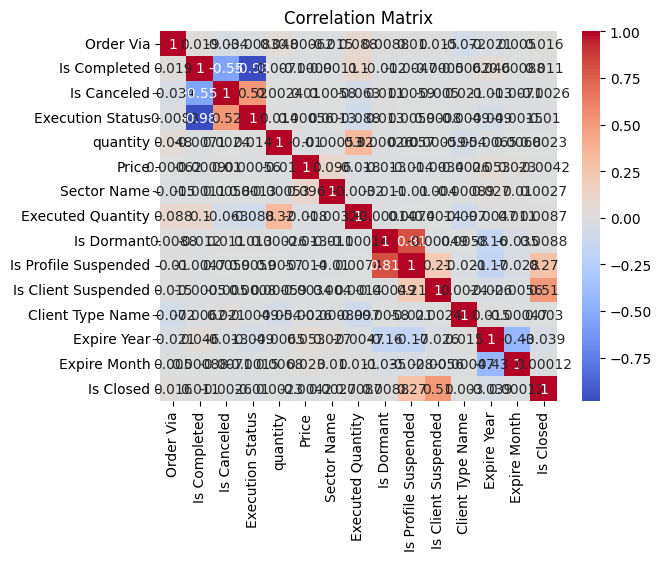

In [17]:
def load_dataset(file_path):
    """Load the dataset from a CSV file."""
    return pd.read_csv(file_path)


def perform_eda(data):
    """Perform exploratory data analysis (EDA)."""
    # Basic statistics for numerical features
    print(data.describe())

    # Check for missing values
    print(data.isnull().sum())

    # Visualize distributions of numerical features
    # sns.pairplot(data)
    # plt.title("Pairplot")
    # plt.show()

    # Visualize correlation matrix
    corr_matrix = data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
    plt.title("Correlation Matrix")
    plt.show()


def feature_engineering(data):
    """Perform feature engineering on the dataset."""
    
    
    return data


# Example usage:
perform_eda(df)
df = feature_engineering(df)
# Now you can continue with your analysis using the modified dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987588 entries, 0 to 1987587
Data columns (total 15 columns):
 #   Column                Dtype
---  ------                -----
 0   Order Via             int8 
 1   Is Completed          bool 
 2   Is Canceled           bool 
 3   Execution Status      int8 
 4   quantity              int64
 5   Price                 int32
 6   Sector Name           int8 
 7   Executed Quantity     int64
 8   Is Dormant            bool 
 9   Is Profile Suspended  bool 
 10  Is Client Suspended   bool 
 11  Client Type Name      int8 
 12  Expire Year           int8 
 13  Expire Month          int8 
 14  Is Closed             bool 
dtypes: bool(6), int32(1), int64(2), int8(6)
memory usage: 60.7 MB


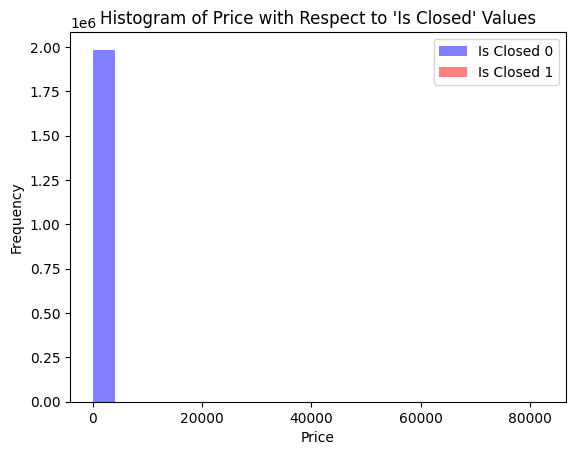

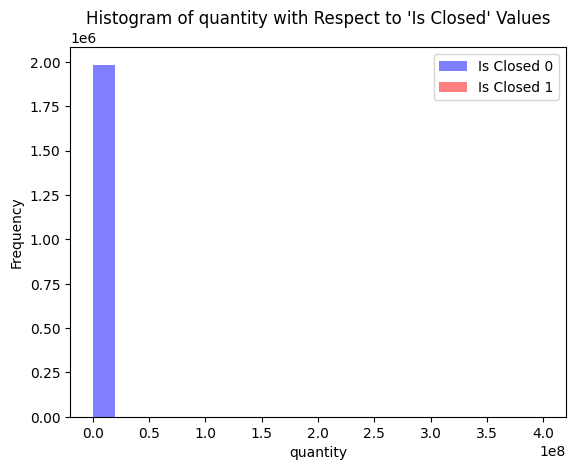

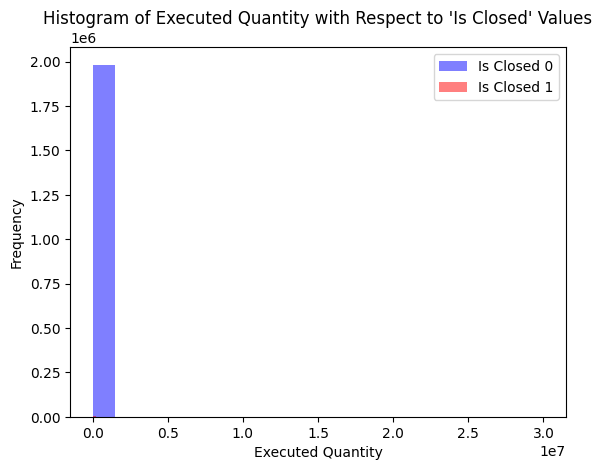

In [19]:
# Assuming 'Balance' is the column you want to create a histogram for
num_features = ["Price", "quantity", "Executed Quantity"]
target_column = "Is Closed"

# Separate data based on 'Exited' value
exited_0 = df[(df[target_column] == 0)]
exited_1 = df[(df[target_column] == 1)]

# Create histograms for each 'Exited' value
for n in num_features:
    plt.hist(exited_0[n], bins=20, alpha=0.5, label='Is Closed 0', color='blue')
    plt.hist(exited_1[n], bins=20, alpha=0.5, label='Is Closed 1', color='red')
 
    plt.xlabel(n)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f"Histogram of {n} with Respect to 'Is Closed' Values")
    plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987588 entries, 0 to 1987587
Data columns (total 15 columns):
 #   Column                Dtype
---  ------                -----
 0   Order Via             int8 
 1   Is Completed          bool 
 2   Is Canceled           bool 
 3   Execution Status      int8 
 4   quantity              int64
 5   Price                 int32
 6   Sector Name           int8 
 7   Executed Quantity     int64
 8   Is Dormant            bool 
 9   Is Profile Suspended  bool 
 10  Is Client Suspended   bool 
 11  Client Type Name      int8 
 12  Expire Year           int8 
 13  Expire Month          int8 
 14  Is Closed             bool 
dtypes: bool(6), int32(1), int64(2), int8(6)
memory usage: 60.7 MB


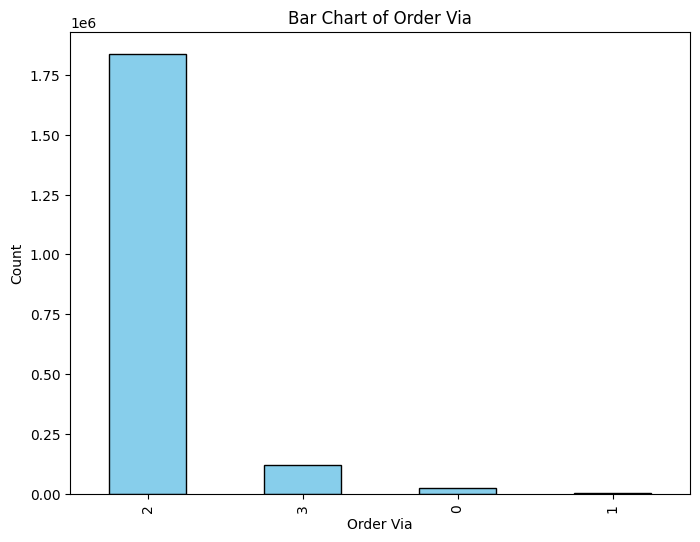

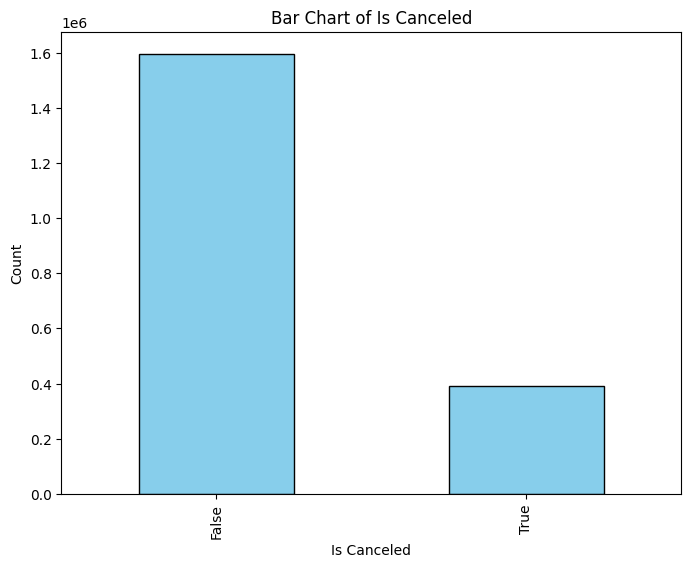

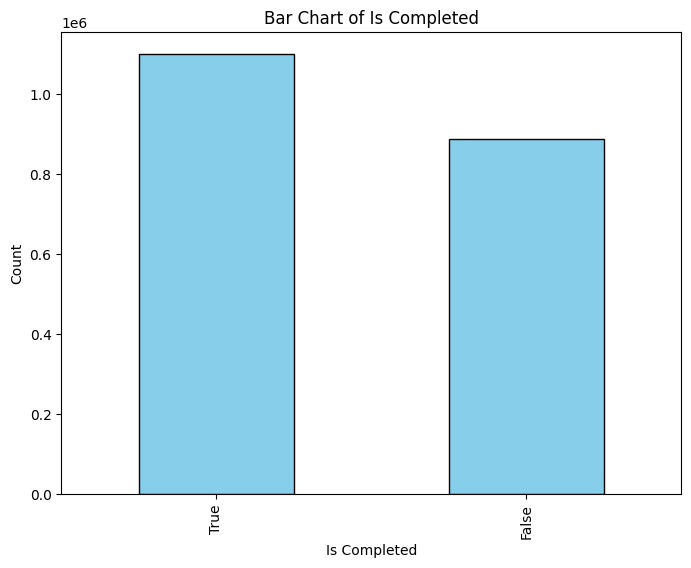

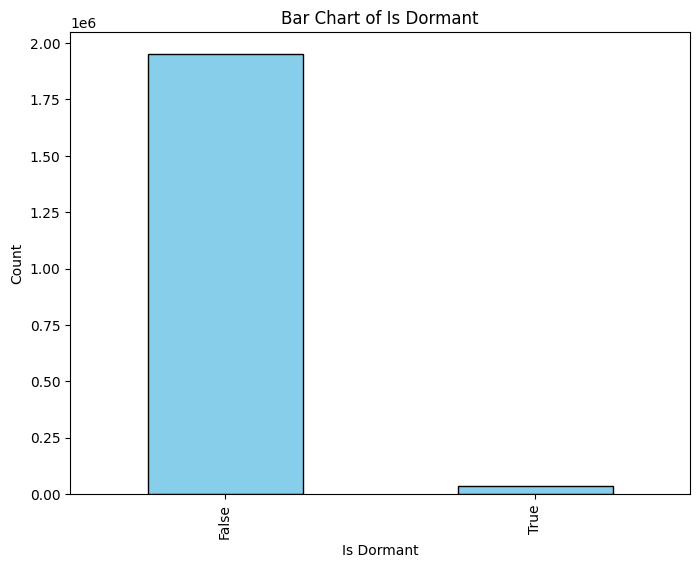

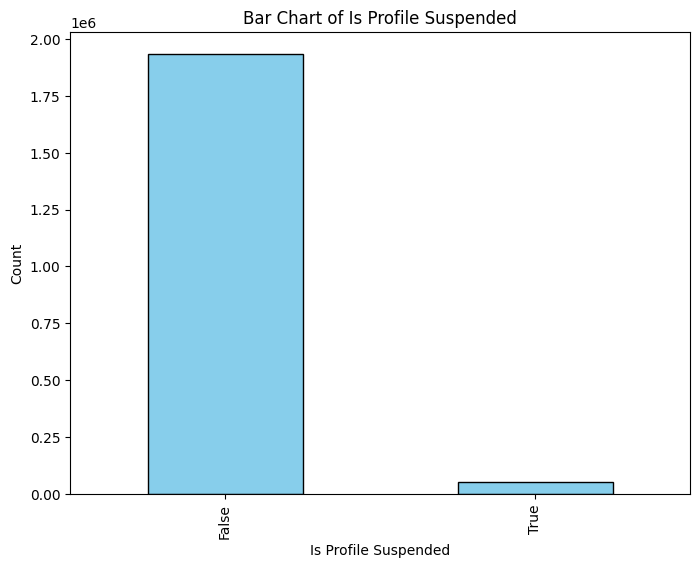

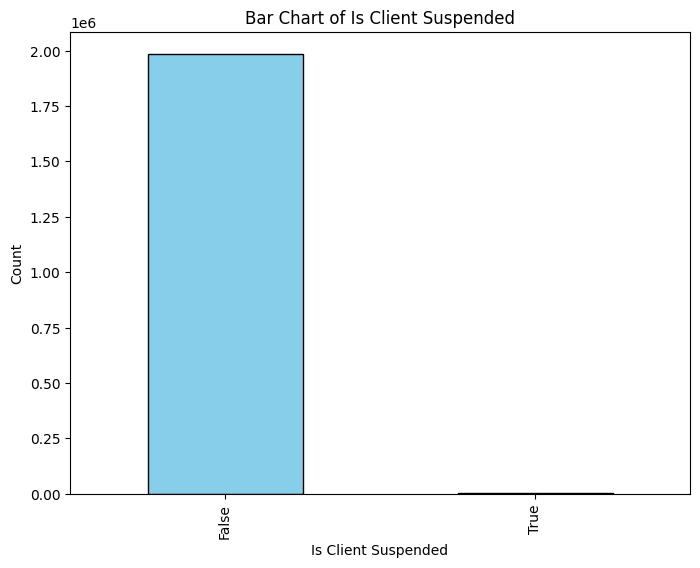

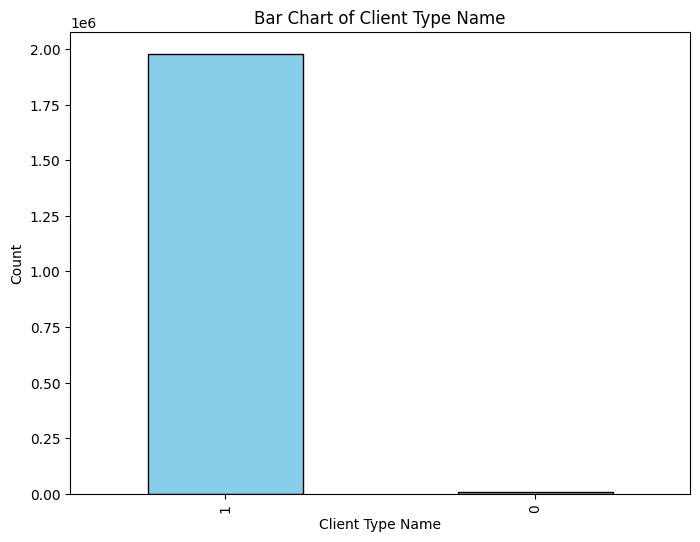

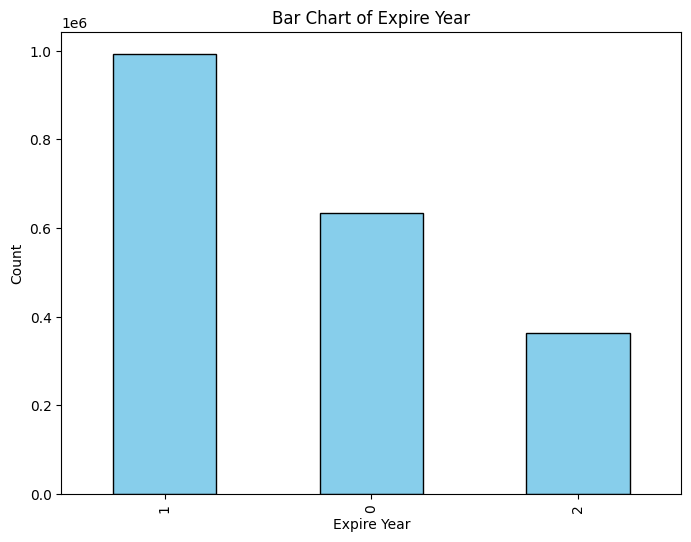

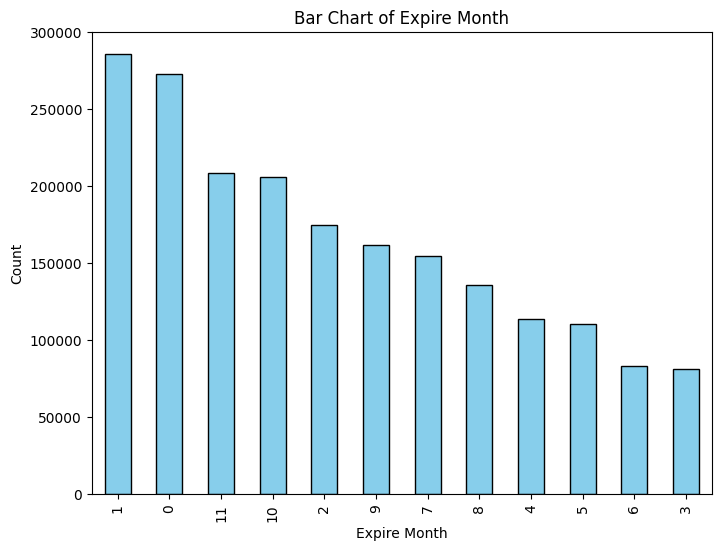

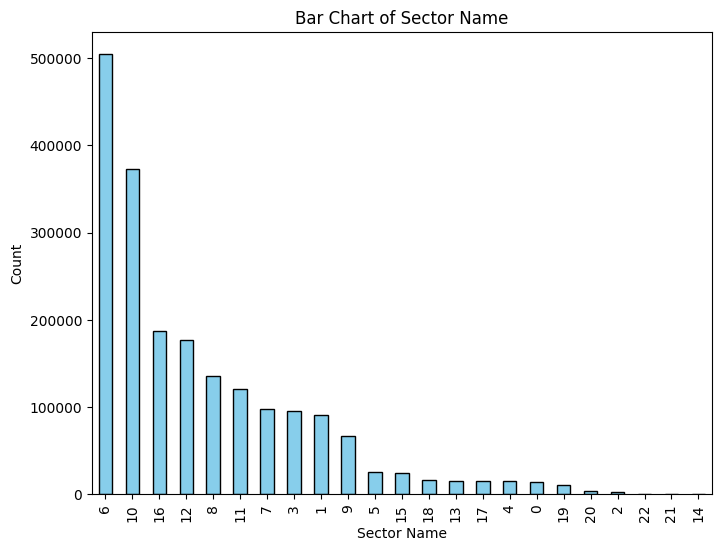

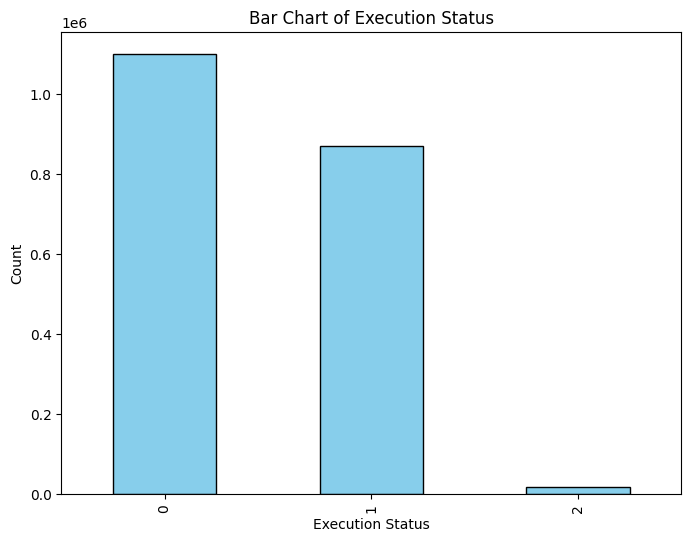

           Client Type Name  Execution Status  Expire Month  Expire Year  \
Is Closed                                                                  
False              0.995483          0.455879      5.210645     0.864820   
True               1.000000          0.338185      5.221263     0.264677   

           Is Canceled  Is Client Suspended  Is Completed  Is Dormant  \
Is Closed                                                               
False         0.197445             0.000447      0.553048    0.017579   
True          0.174642             0.404292      0.670942    0.043167   

           Is Profile Suspended  Order Via  Sector Name  
Is Closed                                                
False                  0.024834   2.034284     8.800013  
True                   1.000000   2.153922     9.039714  


In [21]:
# Assuming 'target_column' is the name of your target column
# and 'train' is your DataFrame
target_column = 'Is Closed'

# List of numerical features
categorial_features = ["Order Via","Is Canceled","Is Completed","Is Dormant", "Is Profile Suspended", "Is Client Suspended", "Client Type Name","Expire Year","Expire Month","Sector Name","Execution Status"]


for feature in categorial_features:
    plt.figure(figsize=(8, 6))
    df[feature].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Bar Chart of {feature}')
    plt.show()
# Create a pivot table
pivot_table = pd.pivot_table(df, values=categorial_features, index=target_column, aggfunc='mean')

# Display the pivot table
print(pivot_table)



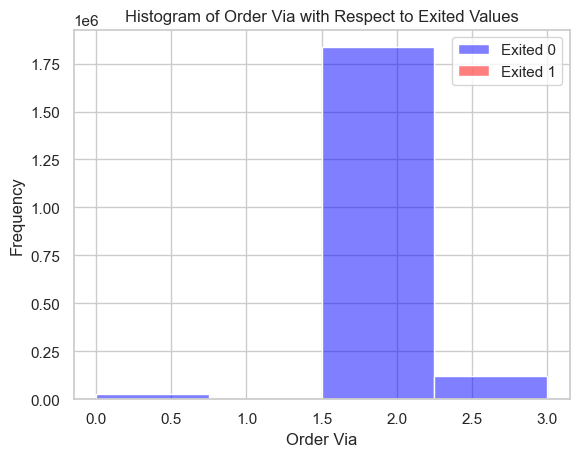

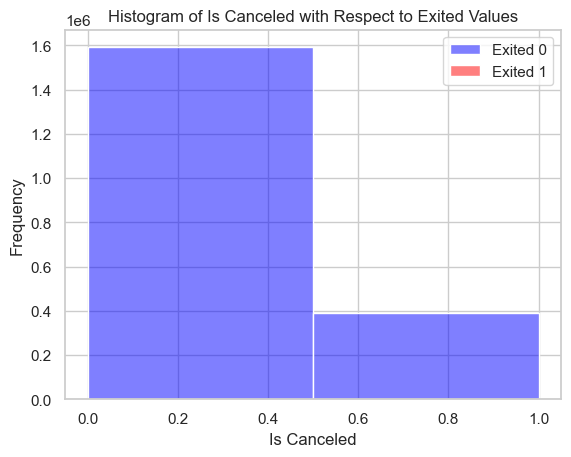

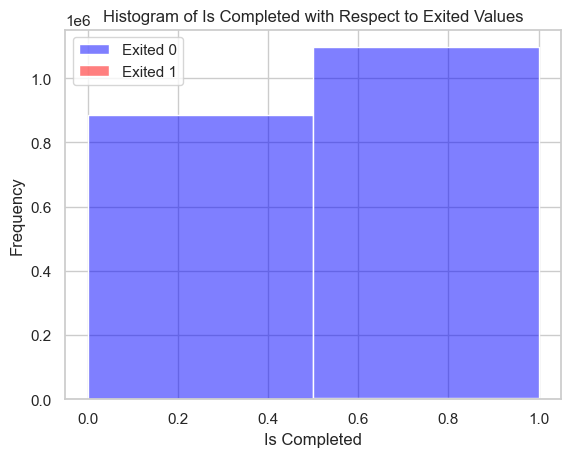

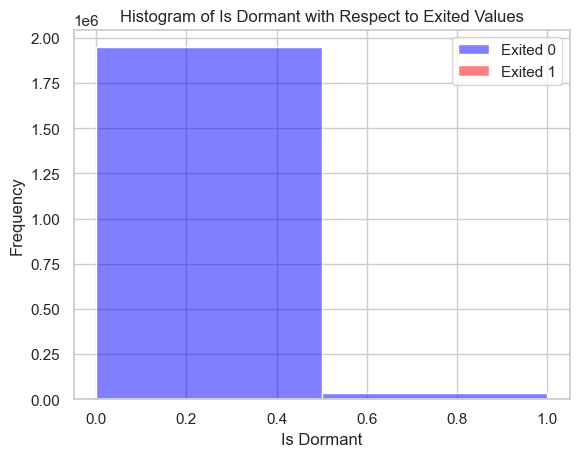

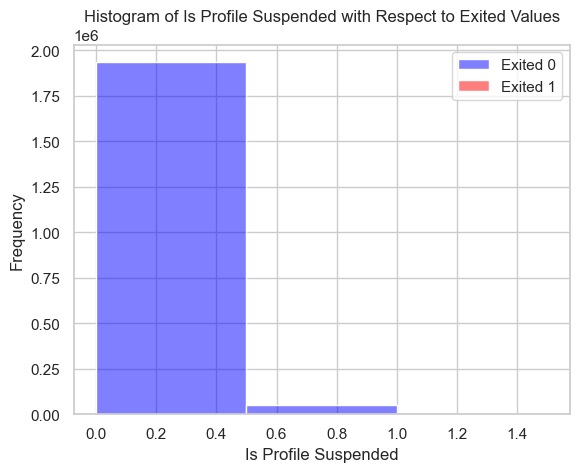

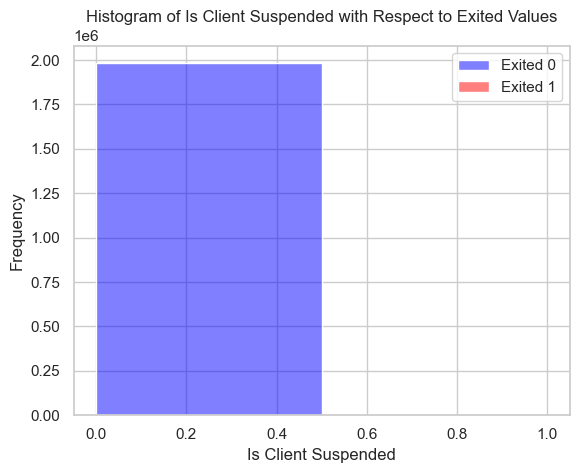

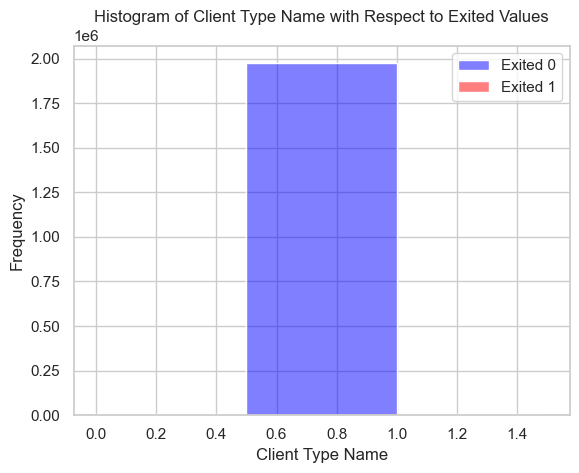

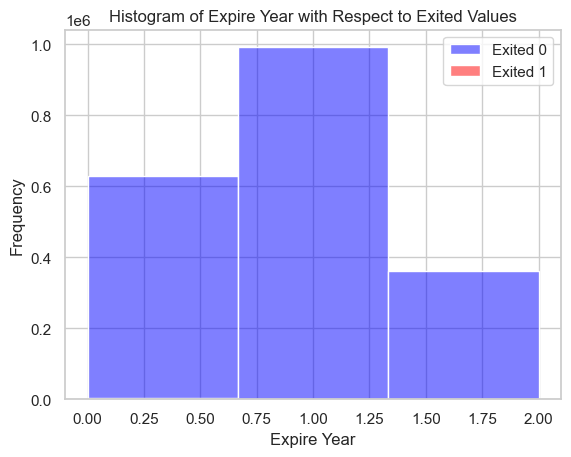

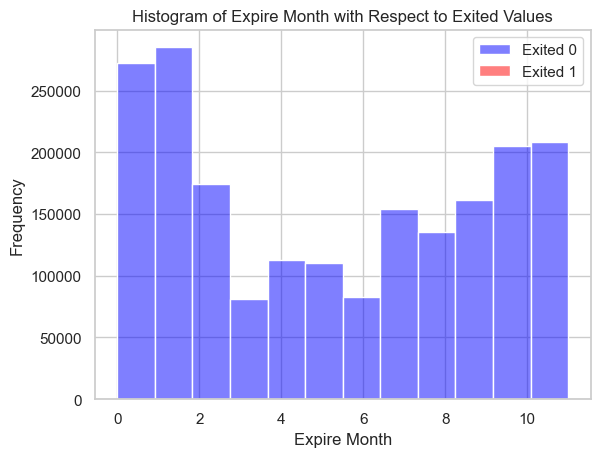

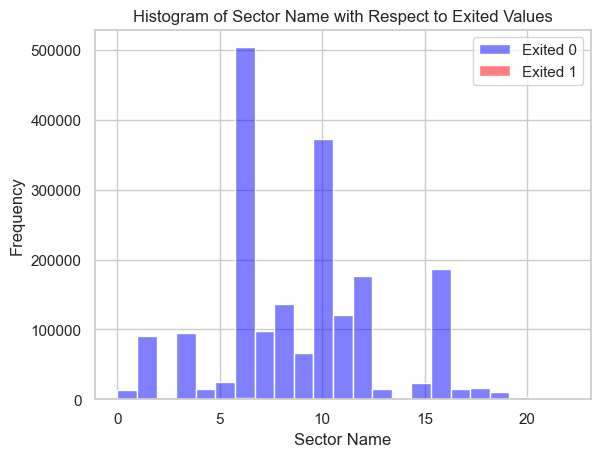

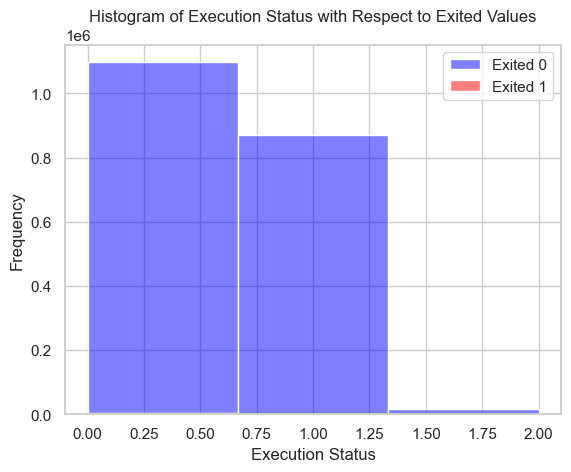

In [22]:
for i in categorial_features:
    # Set the style for the plot (optional)
    sns.set(style="whitegrid")

    # Create histograms for each 'exit' value using Seaborn
    sns.histplot(exited_0[i], bins=df[i].nunique(), alpha=0.5, label='Exited 0', color='blue')
    sns.histplot(exited_1[i], bins=df[i].nunique(), alpha=0.5, label='Exited 1', color='red')
    

    # Add labels and legend
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('Histogram of '+ i + ' with Respect to Exited Values')

    # Show the plot
    plt.show()

In [23]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987588 entries, 0 to 1987587
Data columns (total 15 columns):
 #   Column                Dtype
---  ------                -----
 0   Order Via             int8 
 1   Is Completed          bool 
 2   Is Canceled           bool 
 3   Execution Status      int8 
 4   quantity              int64
 5   Price                 int32
 6   Sector Name           int8 
 7   Executed Quantity     int64
 8   Is Dormant            bool 
 9   Is Profile Suspended  bool 
 10  Is Client Suspended   bool 
 11  Client Type Name      int8 
 12  Expire Year           int8 
 13  Expire Month          int8 
 14  Is Closed             bool 
dtypes: bool(6), int32(1), int64(2), int8(6)
memory usage: 60.7 MB


In [24]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.utils import resample
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import xgboost as xgb 

In [25]:
df = remove_unnecessary_attributes(df, ["Is Completed","Is Dormant","Is Profile Suspended","Is Client Suspended"])

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Function to train and evaluate a classifier
def train_and_evaluate_classifier(name, clf, X_train, y_train, X_test, y_test):
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Predict probabilities for positive class
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    
    # Calculate AUC-ROC Score
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Predict classes
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    acc_score = accuracy_score(y_test, y_pred)
    
    # Print evaluation metrics
    print(f"\nEvaluation metrics for {name}:")
    print(f"AUC-ROC Score: {auc_score}")
    print(f"Accuracy Score: {acc_score}")
    
    # Print confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Function to test different models with different dataset features 
def test_models(datasets, classifiers, target):
    i = 0
    for dataset in datasets:
        i = i + 1
        X = dataset.drop(target, axis=1)
        y = dataset[target]

        # Split the dataset into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        print("Test case: " + str(i))
        
        # Train and evaluate classifiers for the dataset
        for name, clf in classifiers.items():
            train_and_evaluate_classifier(name, clf, X_train, y_train, X_test, y_test)
            
        print("--------------------------------------------------------------")




In [ ]:
datasets = [
    df
]
# Define classifiers
classifiers = {
    # 'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=250,n_jobs=4,weights='distance',algorithm='kd_tree'),
    'LogisticRegression': LogisticRegression(random_state=42),
    'XGBoost': xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.3, n_estimators=1000, learning_rate=0.05, n_jobs=4, max_depth=5, alpha=10),
    'XGBoost kaggle': xgb.XGBClassifier(objective='binary:logistic', n_estimators=1000, learning_rate=0.05, n_jobs=4),
    'XGBoost chatgpt': xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10),
    'Random Forest': RandomForestClassifier(random_state=42),
    'descision Tree': DecisionTreeClassifier()
}

test_models(datasets,classifiers,["Is Closed"])    


In [33]:
import pandas as pd

# Load order data
order_data = pd.read_csv("../data/orders_data_competition.csv")

# Load client data
client_data = pd.read_csv("../data/clients_data_competition.csv")

# Convert Order Time to datetime
order_data['Order Time'] = pd.to_datetime(order_data['Order Time'])

# Calculate Recency, Frequency, and Monetary values
snapshot_date = max(order_data['Order Time']) + pd.Timedelta(days=1)
rfm_table = order_data.groupby('Account ID').agg({
    'Order Time': lambda x: (snapshot_date - x.max()).days,
    'Order ID': 'count',
    'Price': 'sum'
}).reset_index()

# Rename columns
rfm_table.rename(columns={
    'Order Time': 'Recency',
    'Order ID': 'Frequency',
    'Price': 'Monetary'
}, inplace=True)

# Merge client data with RFM table
merged_data = pd.merge(rfm_table, client_data[['Account ID', 'Is Closed']], on='Account ID', how='left')

# Print summary statistics
print(merged_data.describe())

# RFM scoring
quantiles = merged_data.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

def r_score(x):
    if x <= quantiles['Recency'][0.25]:
        return 4
    elif x <= quantiles['Recency'][0.5]:
        return 3
    elif x <= quantiles['Recency'][0.75]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quantiles[c][0.25]:
        return 1
    elif x <= quantiles[c][0.5]:
        return 2
    elif x <= quantiles[c][0.75]:
        return 3
    else:
        return 4

merged_data['R'] = merged_data['Recency'].apply(r_score)
merged_data['F'] = merged_data['Frequency'].apply(fm_score, args=('Frequency',))
merged_data['M'] = merged_data['Monetary'].apply(fm_score, args=('Monetary',))

# Calculate RFM score
merged_data['RFM_Score'] = merged_data['R'] * 100 + merged_data['F'] * 10 + merged_data['M']

# Print RFM table
print(merged_data.head())

         Account ID      Recency     Frequency       Monetary    Is Closed
count   9729.000000  9729.000000   9729.000000    9729.000000  9729.000000
mean    6860.931442   167.232809    204.331689    3806.719807     0.010279
std     3912.552281   229.472200    586.481033   14502.442780     0.100866
min        0.000000     1.000000      1.000000       0.010000     0.000000
25%     3469.000000     5.000000      6.000000      52.830000     0.000000
50%     6955.000000    35.000000     31.000000     354.289000     0.000000
75%    10275.000000   272.000000    152.000000    2126.171000     0.000000
max    13521.000000   799.000000  11691.000000  415929.335000     1.000000
   Account ID  Recency  Frequency  Monetary  Is Closed  R  F  M  RFM_Score
0           0      509          2     2.420          0  1  1  1        111
1           1      544          7    13.877          0  1  2  1        121
2           2       12         21   160.706          0  3  2  2        322
3           3        1   

In [35]:
order_data[order_data["Account ID"] < 1]

,Order ID,Account ID,Market Key,Security ID,Order Type,Order Time,Order Via,Is Completed,Is Canceled,Expire Date,Execution Status,quantity,Price,Sector Name,Executed Quantity,Quantity
651876,651876,0,Egypt,50,Buy,2022-10-19 11:50:29,Call Center,1,0,2022-10-19 00:00:00.000,Executed,8000,1.22,Basic Materials,8000,8000
652171,652171,0,Egypt,50,Buy,2022-10-19 12:24:04,Call Center,1,0,2022-10-19 00:00:00.000,Executed,4000,1.20,Basic Materials,4000,4000


In [54]:
merged_data["Is Closed"].sum()

100

In [55]:
from imblearn.over_sampling import SMOTE

def oversample_smote(df, target_column):
    """
    Oversample the minority class using SMOTE.
    
    Parameters:
    - df: DataFrame containing the dataset.
    - target_column: Name of the column representing the target variable.
    
    Returns:
    - balanced_df: DataFrame with balanced classes.
    """
    # Separate data into features and target variable
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Oversample using SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Combine resampled data into DataFrame
    balanced_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name=target_column)], axis=1)

    return balanced_df

# Example usage:
df_oversampled = oversample_smote(merged_data, "Is Closed")


In [56]:
df_oversampled

,Account ID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Is Closed
0,0,509,2,2.420000,1,1,1,111,0
1,1,544,7,13.877000,1,2,1,121,0
2,2,12,21,160.706000,3,2,2,322,0
3,3,1,88,6341.270000,4,3,4,434,0
4,4,14,30,85.388000,3,2,2,322,0
...,...,...,...,...,...,...,...,...,...
19253,6832,442,2,38.037392,1,1,1,111,1
19254,2445,159,4,18.997854,1,1,1,201,1
19255,2466,404,274,2996.214573,1,4,4,183,1
19256,192,704,31,196.906862,1,1,1,120,1


In [60]:
classifiers = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'XGBoost': xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.3, learning_rate=0.05, n_jobs=-1, max_depth=5, alpha=10),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

test_models([df_oversampled],classifiers,["Is Closed"])    


Test case: 1

Evaluation metrics for LogisticRegression:
AUC-ROC Score: 0.9129990912441059
Accuracy Score: 0.8463136033229491
Confusion Matrix:
[[1505  418]
 [ 174 1755]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1923
           1       0.81      0.91      0.86      1929

    accuracy                           0.85      3852
   macro avg       0.85      0.85      0.85      3852
weighted avg       0.85      0.85      0.85      3852


Evaluation metrics for XGBoost:
AUC-ROC Score: 0.9722954807253981
Accuracy Score: 0.9052440290758048
Confusion Matrix:
[[1647  276]
 [  89 1840]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1923
           1       0.87      0.95      0.91      1929

    accuracy                           0.91      3852
   macro avg       0.91      0.91      0.91      3852
weighted avg       0.91      0.91    

c:\Users\Mohamed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mohamed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Mohamed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 


Evaluation metrics for Random Forest:
AUC-ROC Score: 0.9987626254661384
Accuracy Score: 0.9846832814122534
Confusion Matrix:
[[1879   44]
 [  15 1914]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1923
           1       0.98      0.99      0.98      1929

    accuracy                           0.98      3852
   macro avg       0.98      0.98      0.98      3852
weighted avg       0.98      0.98      0.98      3852


Evaluation metrics for Decision Tree:
AUC-ROC Score: 0.9774065923756702
Accuracy Score: 0.9774143302180686
Confusion Matrix:
[[1870   53]
 [  34 1895]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1923
           1       0.97      0.98      0.98      1929

    accuracy                           0.98      3852
   macro avg       0.98      0.98      0.98      3852
weighted avg       0.98      0.98      0.98      